<div class="frontmatter text-center">
<h1> Introduction to Data Science and Programming</h1>
<h2>Exercise 12: Single variable analysis</h2>
<h3>IT University of Copenhagen, Fall 2023</h3>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline

Exploratory Data Analysis (EDA) refers to the **extremely important** process of performing initial investigations on data so as to discover patterns, to spot anomalies, etc. with the help of summary statistics and graphical representations. Here we practice it for single variables.

In short, it is a good practice to always start your process by understanding the data and trying to gather as many insights from it as possible. EDA is all about making sense of the data in hand, before getting your hands dirty with it.

### 12.0. Loading in the data
In the folder for today's exercises, you have been supplied with the file ```marvel-wikia-data.csv``` which contains data about comic book characters from the Marvel universe. The file has the following variables:

| | Variable | Definition |
| -:- | :- | :- | 
| 0 | page_id | The unique identifier for that characters page within the wikia |
| 1 | name | The name of the character |
| 2 | urlslug | The unique url within the wikia that takes you to the character | 
| 3 | ID | The identity status of the character (Secret Identity, Public identity, [on marvel only: No Dual Identity])
| 4 | ALIGN | If the character is Good, Bad or Neutral | 
| 5 | EYE | Eye color of the character | 
| 6 | HAIR | Hair color of the character | 
| 7 | SEX | Sex of the character (e.g. Male, Female, etc.) |
| 8 | GSM | If the character is a gender or sexual minority (e.g. Homosexual characters, bisexual characters) |
| 9 | ALIVE | If the character is alive or deceased |
| 10 | APPEARANCES | The number of appareances of the character in comic books (as of Sep. 2, 2014. Number will become increasingly out of date as time goes on.) |
| 11 | FIRST APPEARANCE | The month and year of the character's first appearance in a comic book, if available |
| 12 | YEAR | The year of the character's first appearance in a comic book, if available |

We have made a function for you to read the csv file into a numpy array.

In [2]:
def readCSVToNumpyArray(datafile):
    values = [[]]
    with open(datafile) as f:
        counter = 0
        for line in csv.reader(f):
            for value in line:
                try:
                    values[counter].append(float(value))
                except ValueError:
                    values[counter].append(value)
            counter += 1
            values.append([])

    data = np.array(values[:-1])

    return data

#### Load the data  using `readCSVToNumpyArray()` function, and have a look at it

In [ ]:
readCSVToNumpyArray('files/marvel-wikia-data.csv')

### 12.1. Separate the header from the data

The first row of the array contains only the header information. This will interfere with our data analysis, and so we need to remove it. 

Hint: https://www.pythoninformer.com/python-libraries/numpy/index-and-slice/


```[[1678.0 'Spider-Man (Peter Parker)' '\\/Spider-Man_(Peter_Parker)' ... 4043.0 'Aug-62' 1962.0] ... ]```


In [4]:
data = readCSVToNumpyArray('files/marvel-wikia-data.csv')[1:,:]
data

array([['1678.0', 'Spider-Man (Peter Parker)',
        '\\/Spider-Man_(Peter_Parker)', ..., '4043.0', 'Aug-62',
        '1962.0'],
       ['7139.0', 'Captain America (Steven Rogers)',
        '\\/Captain_America_(Steven_Rogers)', ..., '3360.0', 'Mar-41',
        '1941.0'],
       ['64786.0', 'Wolverine (James \\"Logan\\" Howlett)',
        '\\/Wolverine_(James_%22Logan%22_Howlett)', ..., '3061.0',
        'Oct-74', '1974.0'],
       ...,
       ['695217.0', 'Tinkerer (Skrull) (Earth-616)',
        '\\/Tinkerer_(Skrull)_(Earth-616)', ..., '', '', ''],
       ['708811.0', 'TK421 (Spiderling) (Earth-616)',
        '\\/TK421_(Spiderling)_(Earth-616)', ..., '', '', ''],
       ['673702.0', 'Yologarch (Earth-616)', '\\/Yologarch_(Earth-616)',
        ..., '', '', '']], dtype='<U71')

### 12.2. Find the total number of characters in the file
Hint: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html

```16376```


In [5]:
np.shape(data)[0]

16376

## Masking

Masking comes up when you want to extract, modify, count, or otherwise manipulate values in an array based on some criteria, For example, you might wish to count all values greater than a certain value, or perhaps remove all outliers that are above some threshold. 

In NumPy, Boolean masking is often the most efficient way to accomplish these types of tasks.

Masks have the same dimensions as the original data they are made from. In a boolean mask, the mask at index `i` is `True` if the condition is evaluated as true for index `i` of the original array, otherwise `False`.
_____

Consider this example array `arr`.

In [6]:
arr = np.array([[1,2,1],[2,3,1],[4,5,3]]) 
print(arr)

[[1 2 1]
 [2 3 1]
 [4 5 3]]


We here create a mask that identifies and extracts the values of `1` in the original array `arr`.

The logical evaluation `arr == 1` will actually give us a mask of the array where the index `i` is `True` if `arr[i] == 1`, otherwise `False`. Try to print `arr == 1` to ensure this for yourself.

This is exactly what we wanted. So we can take the return value of `arr == 1` and assign it to the variable `mask`.

In [7]:
mask = arr == 1
print(mask)

[[ True False  True]
 [False False  True]
 [False False False]]


We now have a **mask for if numbers in `arr` are 1 or not.**

We can now select only the parts of `arr` that match the mask by doing `arr[mask]`. This also allows us to do calculations etc. with only these values.

In [8]:
print(arr[mask])

[1 1 1]


### 12.3. Create a (boolean) mask for if characters have a secret identity

The data for this is in the `ID` column at index 3. 

`[ True, False, False, ...,  True,  True, False]`

In [9]:
id_mask = data[:,3] == 'Secret Identity'
id_mask

array([ True, False, False, ...,  True,  True, False])

### 12.4. Find out how many of the characters have secret identies
Hint: `sum([True, False, False, False, True]) >> 2`

`6275`

In [11]:
sum(id_mask)

6275

### 12.5. Select all rows from the data set where the character has a secret identity
Hint: Use your mask from 11.3.

Save the view to the variable `secret_identities`.

`secret_identities` should start with the rows for Spider-Man, Robert Drake and Piotr Rasputin, while ending with the rows for Jack O'Lantern, Tinkerer and TK421.

In [12]:
secret_identities = data[id_mask]
secret_identities

array([['1678.0', 'Spider-Man (Peter Parker)',
        '\\/Spider-Man_(Peter_Parker)', ..., '4043.0', 'Aug-62',
        '1962.0'],
       ['35350.0', 'Robert Drake (Earth-616)',
        '\\/Robert_Drake_(Earth-616)', ..., '1265.0', 'Sep-63', '1963.0'],
       ['1346.0', 'Piotr Rasputin (Earth-616)',
        '\\/Piotr_Rasputin_(Earth-616)', ..., '1162.0', 'May-75',
        '1975.0'],
       ...,
       ['655292.0', "Jack O'Lantern (Impostor) (Earth-616)",
        '\\/Jack_O%27Lantern_(Impostor)_(Earth-616)', ..., '', '', ''],
       ['695217.0', 'Tinkerer (Skrull) (Earth-616)',
        '\\/Tinkerer_(Skrull)_(Earth-616)', ..., '', '', ''],
       ['708811.0', 'TK421 (Spiderling) (Earth-616)',
        '\\/TK421_(Spiderling)_(Earth-616)', ..., '', '', '']],
      dtype='<U71')

### 12.6. Select all rows from the data set where the character has Yellow Hair and/or Blue Eyes.
Hint1: Use a mask for each condition

Hint2: https://stackoverflow.com/questions/41898000/python-select-row-in-numpy-array-where-multiple-conditions-are-met

There should be `1981` rows in the extracted data array.

In [13]:
res = data[(data[:,6] == 'Yellow Hair') | (data[:,5] == 'Blue Eyes')]
np.shape(res)[0]

1981

### 12.7. How many unique hair colors are there? How many for eye color?
Hint: https://numpy.org/doc/stable/reference/generated/numpy.unique.html

Hair colors: `26`
Eye colors: `25`

In [17]:
print('hair: ', len(np.unique(data[:,6])))
print('eyes: ', len(np.unique(data[:,5])))

hair:  26
eyes:  25


### 12.8. Create a dictionary of the frequency distribution of the *number of appearances* of the characters

The data can be found in the `APPEARANCES` column at index 10. You should have a key for each unique value of the `APPEARANCES` column.

The output should be of the form `{'number_of_occurences': sum_amount_of_characters_matching}`


Hint: `sum(arr==elem)` returns the number of occurences of the value `elem` in `arr`.

**NB!** This will take a few seconds to run as the data set is on the larger side.

Your dictionary should contain `359` keys, and the value at the key `'1.0'` should be `4810`.

In [18]:
D = {number:sum(data[:,10]==number) for number in np.unique(data[:,10])}
print(len(D))
D['1.0']

359


4810

### 12.9. Plot the frequency distribution of the identity status of the characters
Hint: https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html

The data can be found in the `ID` column at index 3.

The frequency of `Known to Authorities Identity` is 15, and thus the bar is not visible on your plot. Additionally, one bar has the empty string as a label, and so it appears to have no label on the plot.

Neat trick: Adding `;` to the end of a line in a jupyter notebook code cell  prevents the return value from being shown automatically. You can use this to remove the ugly text output when plotting.

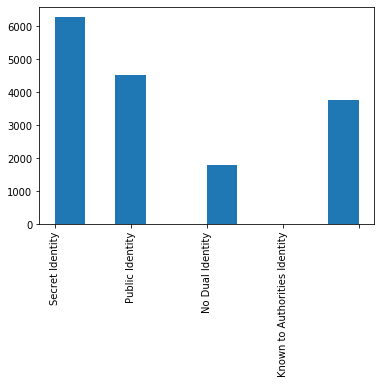

In [19]:
plt.xticks(rotation='vertical') #This makes the labels of the x axis vertical so they don't overlap.
plt.hist(data[:,3]);

### 12.10. Plot a pie chart of the distribution of genders of the characters, for each of the files
Hint: https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.pie.html

The data can be found in the `SEX` column at index 7. The plot should have labels corresponding to the unique values of the `SEX` column.

The third largest wedge will have the empty string as a label, and so it appears to have no label on the plot.

Note: Remember to have the same order for wedges and labels so you don't shuffle your labels!

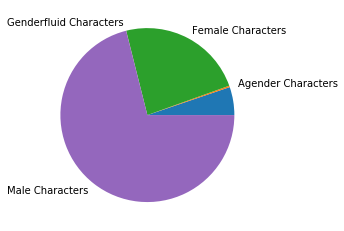

In [20]:
labels = np.unique(data[:,7])
plt.pie([sum(data[:,7]==elem) for elem in labels], labels=labels);

### 12.11. Identify all the years in which Marvel introduced new female characters

The data on the first appearance of a character can be found in the `YEAR` column at index 12. 

We only want the **unique** years where female characters were introduced, i.e. the year 2004 should only be counted once, even if it introduced several new female characters.



There should be `74` unique years.

In [22]:
fem_mask = data[:,7] == "Female Characters"
fem_years = np.unique(data[:,12][fem_mask])
print(fem_years)
len(fem_years)

['' '1939.0' '1940.0' '1941.0' '1942.0' '1943.0' '1944.0' '1945.0'
 '1946.0' '1947.0' '1948.0' '1949.0' '1950.0' '1951.0' '1952.0' '1953.0'
 '1954.0' '1955.0' '1956.0' '1958.0' '1960.0' '1961.0' '1962.0' '1963.0'
 '1964.0' '1965.0' '1966.0' '1967.0' '1968.0' '1969.0' '1970.0' '1971.0'
 '1972.0' '1973.0' '1974.0' '1975.0' '1976.0' '1977.0' '1978.0' '1979.0'
 '1980.0' '1981.0' '1982.0' '1983.0' '1984.0' '1985.0' '1986.0' '1987.0'
 '1988.0' '1989.0' '1990.0' '1991.0' '1992.0' '1993.0' '1994.0' '1995.0'
 '1996.0' '1997.0' '1998.0' '1999.0' '2000.0' '2001.0' '2002.0' '2003.0'
 '2004.0' '2005.0' '2006.0' '2007.0' '2008.0' '2009.0' '2010.0' '2011.0'
 '2012.0' '2013.0']


74

### 12.12. Identify the year in which Marvel introduced the largest number of new characters

The data on the year of introduction for a character can be found in the `YEAR` column at index 12. 

**NB!** In this part, you have to filter out rows with empty string values in column 12 (where `YEAR` = `''`).

The correct year har `554` new introduced characters.

In [23]:
largest_year = 0
year_count = 0
for elem in np.unique(data[:,12]):
    if elem == '': continue
    c = sum(data[:,12] == elem)
    if c > year_count:
        largest_year = elem
        year_count = c

largest_year, year_count

('1993.0', 554)